In [7]:
import tensorflow as tf # в дальнейшем эта строка будет опускаться

In [9]:
def linear_transform(vec , shape):
    w = tf.Variable(tf.random_normal(shape , mean =0.0 , stddev =1.0))
    return tf.matmul(vec , w)
    

In [23]:
import numpy as np 
import tensorflow as tf

In [24]:
n_samples , batch_size , num_steps, = 1000 ,100, 20000
X_data = np.random.uniform(1 , 10, (n_samples, 1)) 
y_data = 2 * X_data + 1 + np.random.normal(0 , 2 ,(n_samples , 1))

In [25]:
X = tf.placeholder(tf.float32 , shape=(batch_size , 1))
y = tf.placeholder(tf.float32 , shape=(batch_size , 1))

In [29]:
with tf.variable_scope("linear-regression"):
        k = tf.Variable(tf.random_normal((1, 1)), name = "slope")
        b = tf.Variable(tf.zeros((1,)), name = "bias")

In [30]:
y_pred = tf.matmul(X, k) + b
loss =  tf.reduce_sum((y - y_pred)** 2)
optimizer = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

In [32]:
display_step = 100
with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    for i in range(num_steps):
        inclices = np.random.choice(n_samples , batch_size)
        X_batch, y_batch = X_data[inclices], y_data[inclices] 
        _ , losss_val , k_val , b_val = sess.run([optimizer , loss ,k ,b] , feed_dict = {X : X_batch , y : y_batch})
        
        if (i + 1) % display_step == 0:
            print("Эпоха" ,i ,losss_val , k_val , b_val)

Эпоха 99 None nan [[nan]]
Эпоха 199 None nan [[nan]]
Эпоха 299 None nan [[nan]]
Эпоха 399 None nan [[nan]]
Эпоха 499 None nan [[nan]]
Эпоха 599 None nan [[nan]]
Эпоха 699 None nan [[nan]]
Эпоха 799 None nan [[nan]]
Эпоха 899 None nan [[nan]]
Эпоха 999 None nan [[nan]]
Эпоха 1099 None nan [[nan]]
Эпоха 1199 None nan [[nan]]
Эпоха 1299 None nan [[nan]]
Эпоха 1399 None nan [[nan]]
Эпоха 1499 None nan [[nan]]
Эпоха 1599 None nan [[nan]]
Эпоха 1699 None nan [[nan]]
Эпоха 1799 None nan [[nan]]
Эпоха 1899 None nan [[nan]]
Эпоха 1999 None nan [[nan]]
Эпоха 2099 None nan [[nan]]
Эпоха 2199 None nan [[nan]]
Эпоха 2299 None nan [[nan]]
Эпоха 2399 None nan [[nan]]
Эпоха 2499 None nan [[nan]]
Эпоха 2599 None nan [[nan]]
Эпоха 2699 None nan [[nan]]
Эпоха 2799 None nan [[nan]]
Эпоха 2899 None nan [[nan]]
Эпоха 2999 None nan [[nan]]
Эпоха 3099 None nan [[nan]]
Эпоха 3199 None nan [[nan]]
Эпоха 3299 None nan [[nan]]
Эпоха 3399 None nan [[nan]]
Эпоха 3499 None nan [[nan]]
Эпоха 3599 None nan [[nan]]
Эпо

KeyboardInterrupt: 

Epoch: 0050 cost= 29.887964249 W= 1.8001156 b= -0.0026793191
Epoch: 0100 cost= 22.939405441 W= 2.3001797 b= 0.21255824
Epoch: 0150 cost= 22.215915680 W= 2.399675 b= 0.3643643
Epoch: 0200 cost= 21.841894150 W= 2.4072583 b= 0.49984533
Epoch: 0250 cost= 21.499452591 W= 2.3939488 b= 0.6298674
Epoch: 0300 cost= 21.169914246 W= 2.3760839 b= 0.75696343
Epoch: 0350 cost= 20.851598740 W= 2.3574188 b= 0.88174313
Epoch: 0400 cost= 20.543985367 W= 2.338822 b= 1.0043753
Epoch: 0450 cost= 20.246694565 W= 2.3204827 b= 1.1249259
Epoch: 0500 cost= 19.959379196 W= 2.302435 b= 1.243432
Epoch: 0550 cost= 19.681697845 W= 2.2846916 b= 1.3599356
Epoch: 0600 cost= 19.413318634 W= 2.267246 b= 1.474474
Epoch: 0650 cost= 19.153951645 W= 2.2500944 b= 1.5870695
Epoch: 0700 cost= 18.903276443 W= 2.2332373 b= 1.6977648
Epoch: 0750 cost= 18.661005020 W= 2.2166631 b= 1.8065886
Epoch: 0800 cost= 18.426860809 W= 2.2003696 b= 1.9135702
Epoch: 0850 cost= 18.200576782 W= 2.1843512 b= 2.0187404
Epoch: 0900 cost= 17.98187637

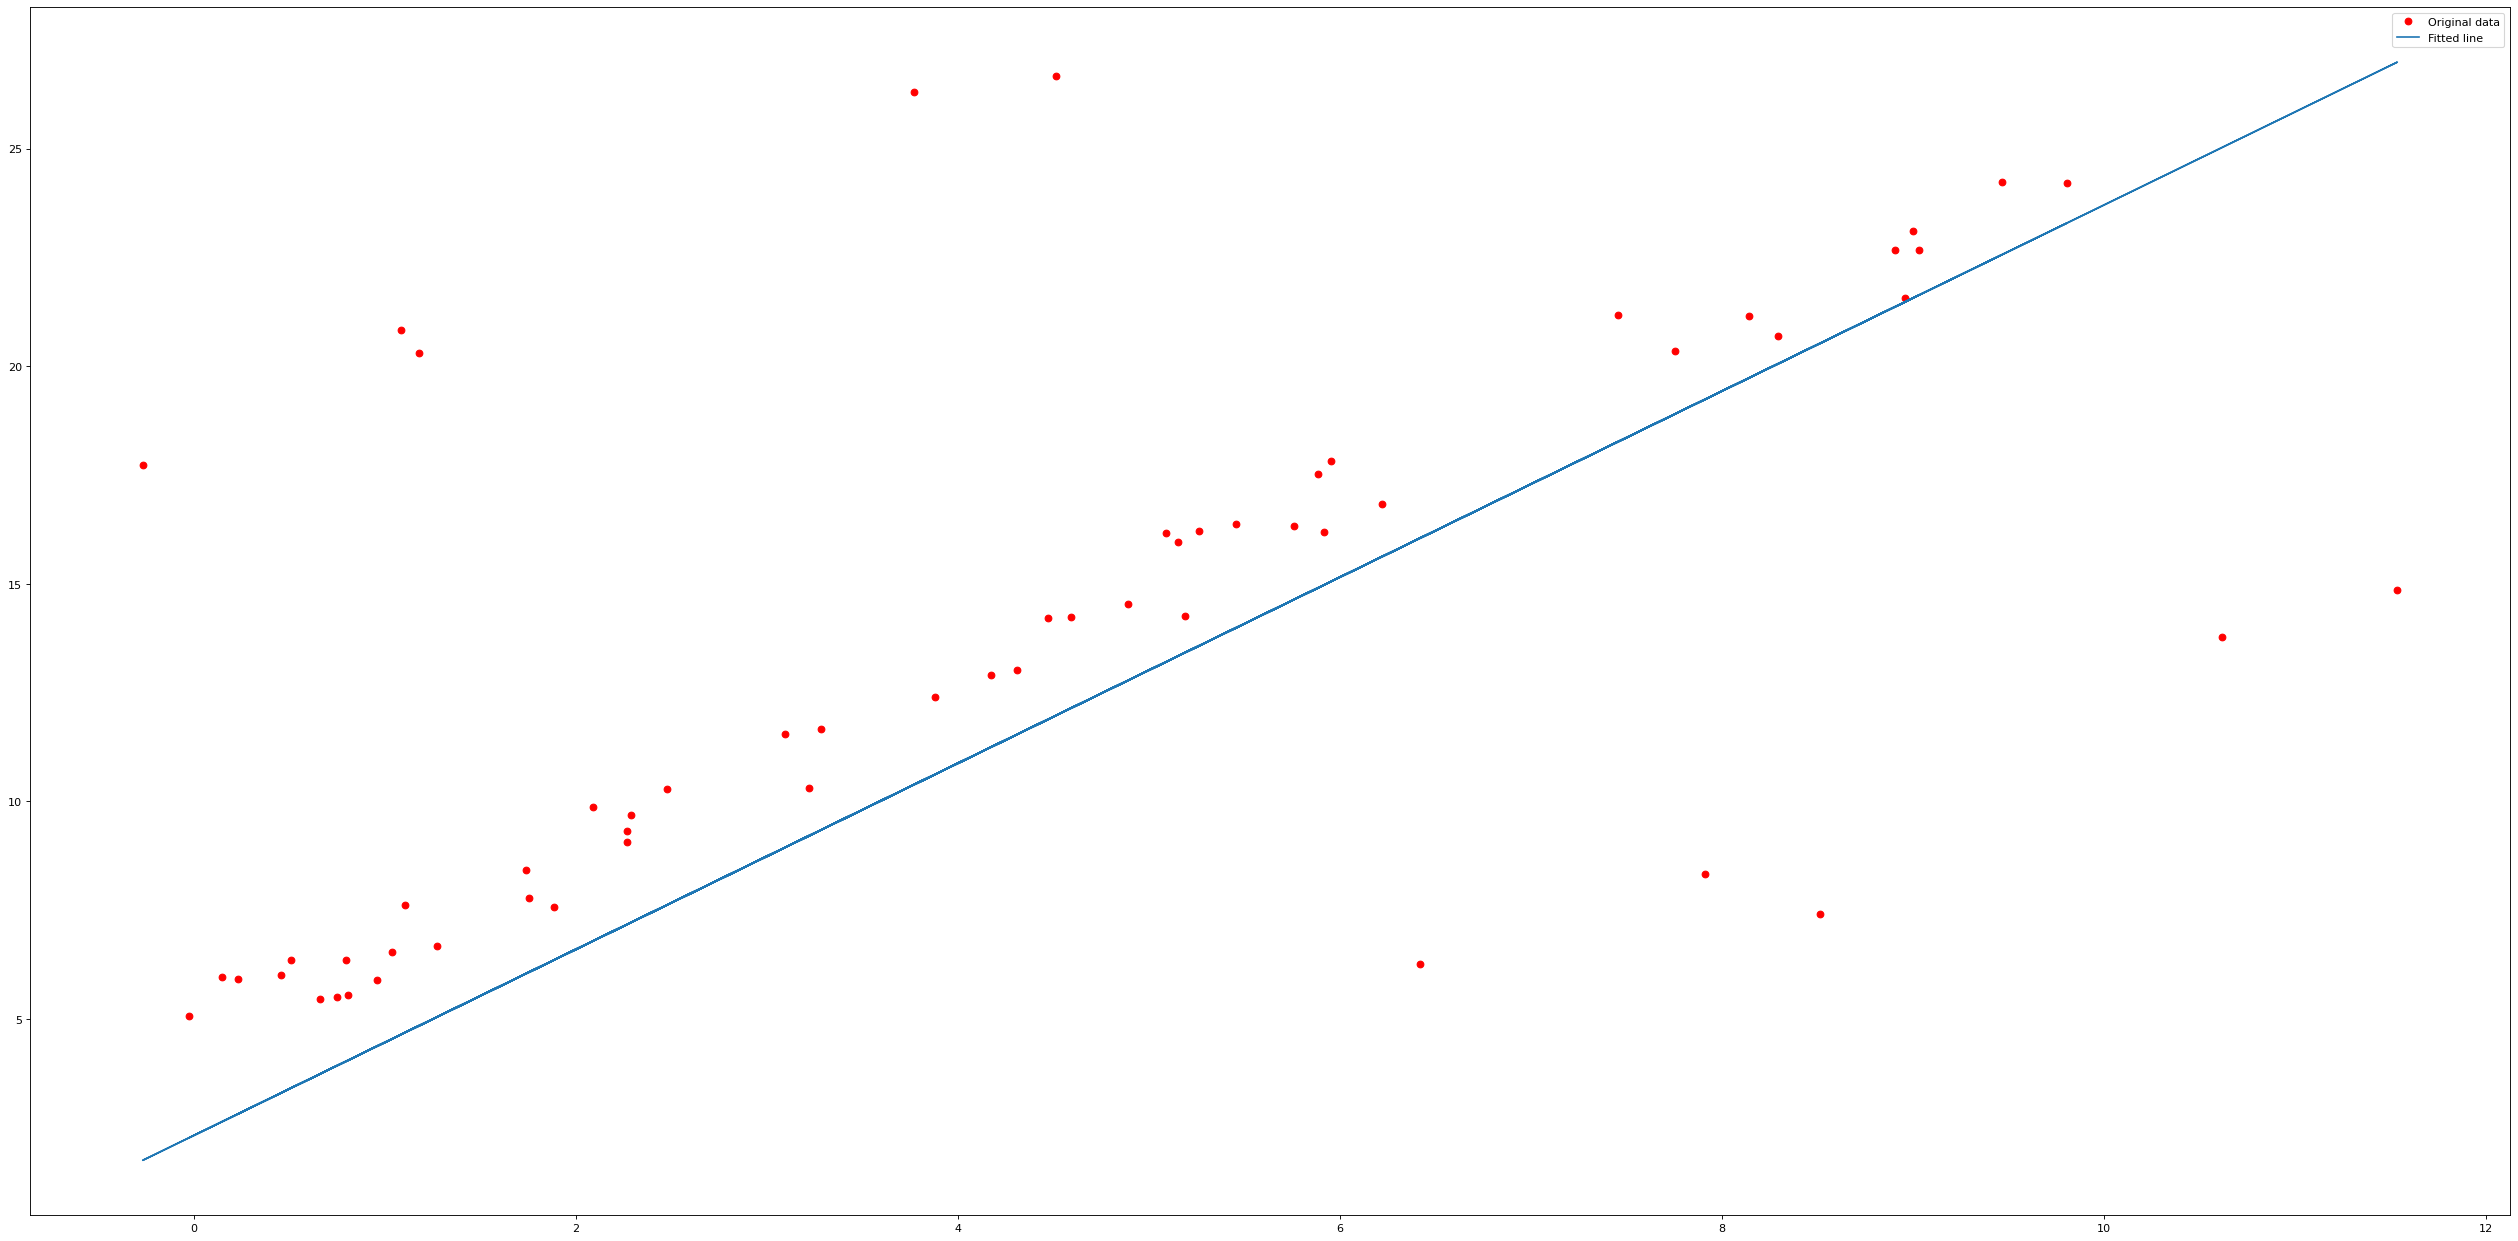

In [41]:

from __future__ import print_function

import tensorflow as tf
from numpy import *
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

# Parameters
learning_rate = 0.001
training_epochs = 1000
display_step = 50

# Training Data
train_X = numpy.asarray(x_all)
train_Y = numpy.asarray(y_all)

train_X=numpy.asarray(train_X)
train_Y=numpy.asarray(train_Y)
n_samples = train_X.shape[0]


# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)


# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initializing the variables
init = tf.global_variables_initializer()

# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    # Graphic display
    plt.figure(figsize=(40, 20),dpi=80)
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Button
from random import randint
from math import sqrt , pow
import pylab


a , b = 2 , 5                # параметры изначальной прямой

leng = 10                    # точка конца
start = 0                    # точка начала
sigma = 0.5                  # модуль ошибки
sigma_err_end = 10 * sigma   # начало построения точек выброса
sigma_err_start = 7 * sigma  # конец построения точек выброса
count = 50                   # колличество точек
count_err = 11              # колличество точек выброса


list_way = [1 for i in range(10)]
list_way_id = [0 for i in range(10)]  # два массива для коректной работы кнопок

def f(x):
    global a,b
    return a*x + b


#############  Задаем точки ###############
x_point = (start - leng) * np.random.rand(count) + leng
y_point = f(x_point) +  ((-2*sigma) * np.random.rand(count) + sigma) 
x_point += (-2*sigma) * np.random.rand(count) + sigma


#############  МНК  для посторения точек выброса #############
x_sum = sum(x_point)
y_sum = sum(y_point)

xy_sum = x_point.dot(y_point.T)
x2_sum = x_point.dot(x_point.T)

a_aprox = (count * xy_sum - x_sum * y_sum) / (count * x2_sum - x_sum**2)
b_aprox = (y_sum - a_aprox * x_sum) / count

x_way = np.linspace(start, leng , 100)
y_way_aprox = a_aprox*x_way + b_aprox


########## Точки выброса ############

x_point_err_up = (start - leng) * np.random.rand(int(count_err/2)) + leng #половина сверху
y_point_err_up = a_aprox*x_point_err_up + b_aprox +  ((sigma_err_start - sigma_err_end) * np.random.rand(int(count_err/2)) + sigma_err_end) 
x_point_err_up -= ((sigma_err_start - sigma_err_end) * np.random.rand(int(count_err/2)) + sigma_err_end) 

x_point_err_down = (start - leng) * np.random.rand(int(count_err/2)) + leng #половина снизу
y_point_err_down = a_aprox*x_point_err_down + b_aprox - ((sigma_err_start - sigma_err_end) * np.random.rand(int(count_err/2)) + sigma_err_end) 
x_point_err_down += ((sigma_err_start - sigma_err_end) * np.random.rand(int(count_err/2)) + sigma_err_end) 

########## Массив всех точек  #######

x_all = np.concatenate((x_point , x_point_err_up , x_point_err_down )) 
y_all = np.concatenate((y_point , y_point_err_up , y_point_err_down )) 

In [42]:
from keras.models import Sequential
from keras.layers import Input , Dense , Activation

logr = Sequential()
logr.add(Dense(1 , input_dim = 2 , activation= "sigmoid"))